# Importing Kaggle API and Downloading Dataset

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c titanic

test.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)
gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Data Processing

In [ ]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
samp_sub = pd.read_csv("gender_submission.csv")

In [ ]:
train_df.drop(columns=['Name','Ticket','Cabin'], inplace=True)
train_df.Embarked = train_df.Embarked.apply(lambda x: 'C' if isinstance(x,float) else x)
train_df.Sex = train_df.Sex.apply(lambda x: 0 if x == 'male' else 1)
train_df.Age = train_df.Age.fillna(0)
train_df.Age = train_df.Age.apply(lambda x: train_df.Age.median() if x == 0 else x)
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,S
887,888,1,1,1,19.0,0,0,30.0000,S
888,889,0,3,1,24.0,1,2,23.4500,S
889,890,1,1,0,26.0,0,0,30.0000,C


In [ ]:
test_df.drop(columns=['Name','Ticket','Cabin'], inplace=True)
test_df.Embarked = test_df.Embarked.apply(lambda x: 'C' if isinstance(x,float) else x)
test_df.Sex = test_df.Sex.apply(lambda x: 0 if x == 'male' else 1)
test_df.Age = test_df.Age.fillna(0)
test_df.Age = test_df.Age.apply(lambda x: test_df.Age.median() if x == 0 else x)
test_df.Fare = test_df.Fare.fillna(0)
test_df.Fare = test_df.Fare.apply(lambda x: test_df.Fare.median() if x == 0 else x)
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,Q
1,893,3,1,47.0,1,0,7.0000,S
2,894,2,0,62.0,0,0,9.6875,Q
3,895,3,0,27.0,0,0,8.6625,S
4,896,3,1,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,0,24.0,0,0,8.0500,S
414,1306,1,1,39.0,0,0,108.9000,C
415,1307,3,0,38.5,0,0,7.2500,S
416,1308,3,0,24.0,0,0,8.0500,S


   Sex  Survived
0    0       109
1    1       233


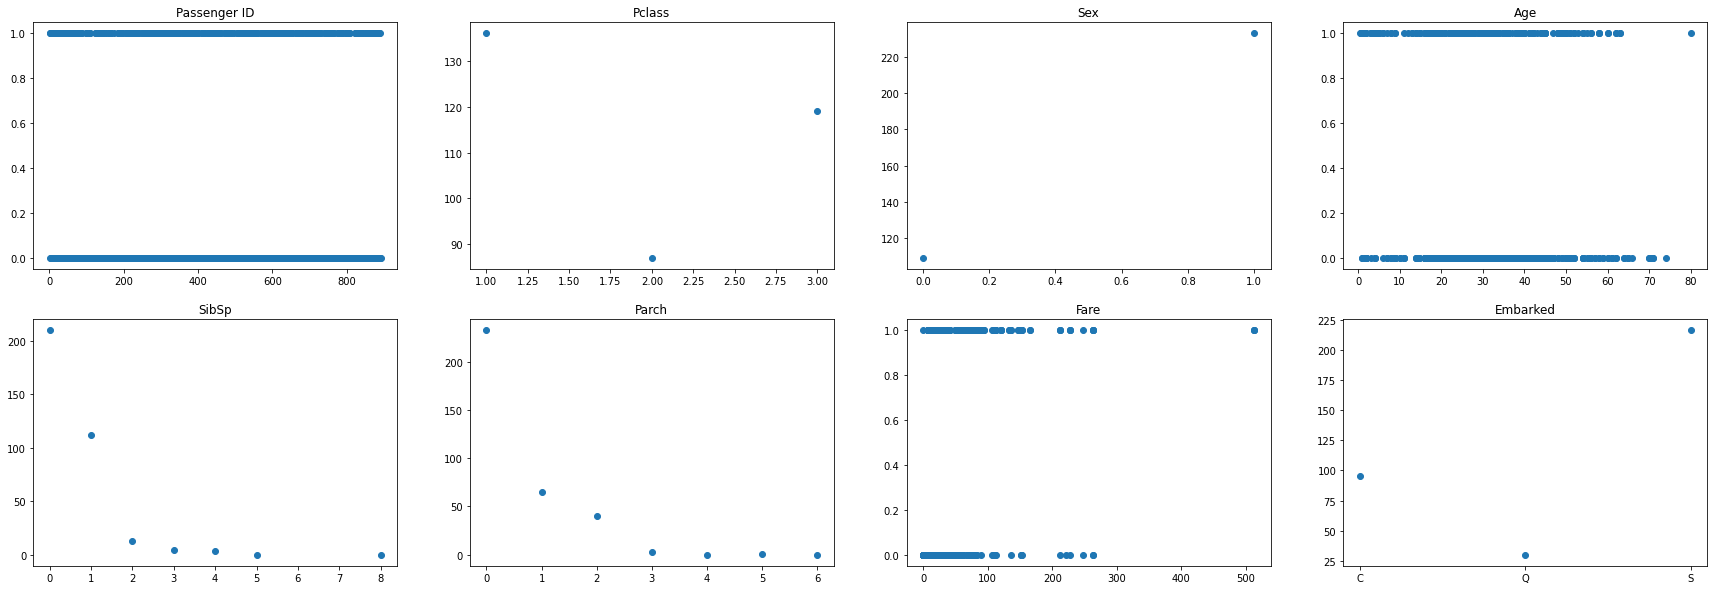

In [ ]:
fig, ax = plt.subplots(nrows= 2, ncols= 4, figsize= (30,10))

temp = train_df[['PassengerId','Survived']]
temp = np.array(temp)
ax[0,0].set_title('Passenger ID')
ax[0,0].scatter(temp[:,0],temp[:,1])

temp = train_df[['Pclass','Survived']]
temp = temp.groupby(by=['Pclass']).sum().reset_index()
temp = np.array(temp)
ax[0,1].set_title('Pclass')
ax[0,1].scatter(temp[:,0],temp[:,1])

temp = train_df[['Sex','Survived']]
temp = temp.groupby(by=['Sex']).sum().reset_index()
print(temp)
temp = np.array(temp)
ax[0,2].set_title('Sex')
ax[0,2].scatter(temp[:,0],temp[:,1])

temp = train_df[['Age','Survived']]
temp = np.array(temp)
ax[0,3].set_title('Age')
ax[0,3].scatter(temp[:,0],temp[:,1])

temp = train_df[['SibSp','Survived']]
temp = temp.groupby(by=['SibSp']).sum().reset_index()
temp = np.array(temp)
ax[1,0].set_title('SibSp')
ax[1,0].scatter(temp[:,0],temp[:,1])

temp = train_df[['Parch','Survived']]
temp = temp.groupby(by=['Parch']).sum().reset_index()
temp = np.array(temp)
ax[1,1].set_title('Parch')
ax[1,1].scatter(temp[:,0],temp[:,1])

temp = train_df[['Fare','Survived']]
temp = np.array(temp)
ax[1,2].set_title('Fare')
ax[1,2].scatter(temp[:,0],temp[:,1])

temp = train_df[['Embarked','Survived']]
temp = temp.groupby(by=['Embarked']).sum().reset_index()
temp = np.array(temp)
ax[1,3].set_title('Embarked')
ax[1,3].scatter(temp[:,0],temp[:,1])

In [ ]:
# temp = train_df.Age.max()
# train_df.Age = train_df.Age.apply(lambda x: x/temp)
# temp = train_df.Fare.max()
# train_df.Fare = train_df.Fare.apply(lambda x: x/temp)
# train_df

In [ ]:
onehot = pd.get_dummies(train_df.Embarked, prefix = 'city')
train_df.drop(columns=['Embarked','PassengerId'], inplace=True)
train_final = train_df.join(onehot)
train_final

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,city_C,city_Q,city_S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0,0,1
887,1,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,1,24.0,1,2,23.4500,0,0,1
889,1,1,0,26.0,0,0,30.0000,1,0,0


In [ ]:
onehot = pd.get_dummies(test_df.Embarked, prefix = 'city')
test_df.drop(columns=['Embarked','PassengerId'], inplace=True)
test_final = test_df.join(onehot)
test_final

,Pclass,Sex,Age,SibSp,Parch,Fare,city_C,city_Q,city_S
0,3,0,34.5,0,0,7.8292,0,1,0
1,3,1,47.0,1,0,7.0000,0,0,1
2,2,0,62.0,0,0,9.6875,0,1,0
3,3,0,27.0,0,0,8.6625,0,0,1
4,3,1,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,3,0,24.0,0,0,8.0500,0,0,1
414,1,1,39.0,0,0,108.9000,1,0,0
415,3,0,38.5,0,0,7.2500,0,0,1
416,3,0,24.0,0,0,8.0500,0,0,1


In [ ]:
test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    int64  
 2   Age     418 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
 5   Fare    418 non-null    float64
 6   city_C  418 non-null    uint8  
 7   city_Q  418 non-null    uint8  
 8   city_S  418 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 20.9 KB


In [ ]:
y_train = train_final['Survived']
train_final.drop(columns=['Survived'], inplace=True)
X_train = train_final
X_test = test_final

# Model Training

## 1.Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
regressor = LogisticRegression(max_iter=1000)
regressor.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_predict = regressor.predict(X_test)

In [ ]:
test_df = pd.read_csv("test.csv")

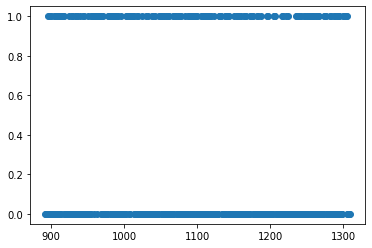

In [ ]:
plt.scatter(test_df['PassengerId'],y_predict)

## 2.Random Forest Regression with GridSearchCV

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

In [ ]:
grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'max_depth': range(3,7)
}

In [ ]:
gd_sr = GridSearchCV(estimator=RandomForestClassifier(),
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

In [ ]:
gd_sr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
best_params = gd_sr.best_params_
best_params

{'max_depth': 4, 'n_estimators': 300}

In [ ]:
gd_sr.best_score_

0.8260435628648548

In [ ]:
rfr = RandomForestClassifier(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], random_state=False, verbose=False)

In [ ]:
rfr.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=False,
                       verbose=False, warm_start=False)

In [ ]:
y_predict = rfr.predict(X_test)

In [ ]:
test_df = pd.read_csv("test.csv")

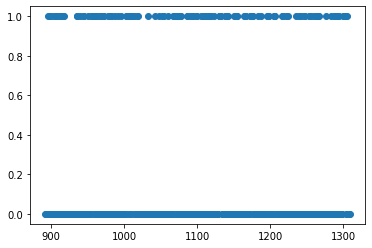

In [ ]:
plt.scatter(test_df['PassengerId'],y_predict)

# Creating Submission

In [ ]:
temp = {'PassengerId':test_df['PassengerId'],'Survived':y_predict}
submission_df = pd.DataFrame(temp)
submission_df.set_index('PassengerId', inplace=True)
submission_df

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [ ]:
submission_df.to_csv('rfr_8-7-20.csv')